### Preparing a Visualization report on the given Job portal dataset


Problem Statement:

I am given a dataset extracted from a famous job portal that explains the job status of various data-related jobs posted during the year 2023. The data explains the various job designations and related salaries from across the world. As a data scientist at Oeson, my job is to extract meaningful insight from this data to explain the actual remuneration each job title is providing across the globe. It will help recruiters understand the job requirements better in term salaries across different levels of work experience so that they can get proficient profiles for any data-related requirement.

In [ ]:
!pip install plotly


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotnine import ggplot, aes, geom_bar
import folium
from folium.plugins import MarkerCluster

Descriptive statistics on numerical data.

In [ ]:
summary_stats = data[['salary', 'salary_in_usd']].describe()

# Print the results
summary_stats

,salary,salary_in_usd
count,9355.000000,9355.000000
mean,149927.981293,150299.495564
std,63608.835387,63177.372024
min,14000.000000,15000.000000
25%,105200.000000,105700.000000
50%,143860.000000,143000.000000
75%,187000.000000,186723.000000
max,450000.000000,450000.000000


In [ ]:
data = pd.read_csv('jobs_in_data.csv')
data

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [ ]:
data['work_year'].unique() # unique work year

array([2023, 2022, 2020, 2021])


Univariate analysis involves exploring individual variables to understand their distribution and characteristics. Below are suggestions for useful distributions and visualizations for each of the specified columns:

- work year
- common job titles
- job category
- salary currency
- employee residence
- experience level
- employment type
- company locations
- company size
- work settings
- salaries


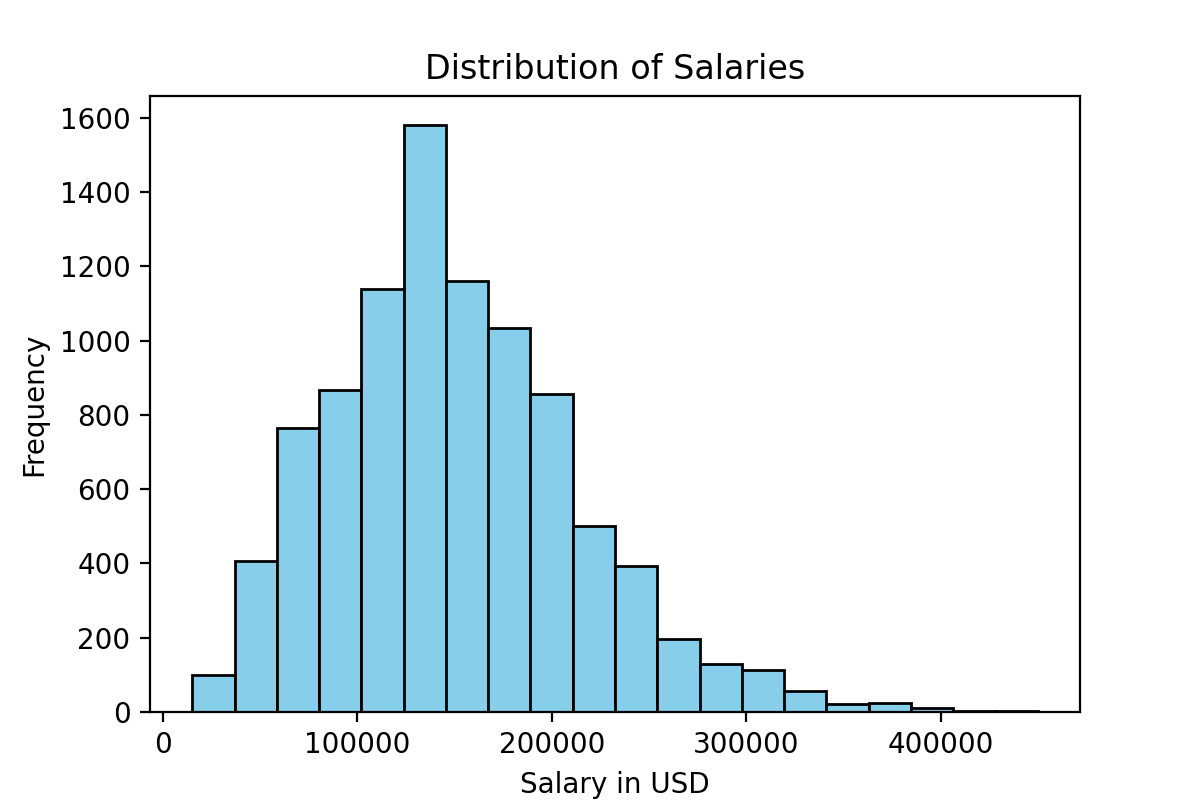

In [ ]:
# Here it is my first distribution chart, it is about salary_in_usd column, and we can see that this is not normal distribution but skewed.
# Most common values are somewhere between 100000 USD and 200000 USD, but also there are outliers and salaray values like 400000 USD.
plt.hist(data['salary_in_usd'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

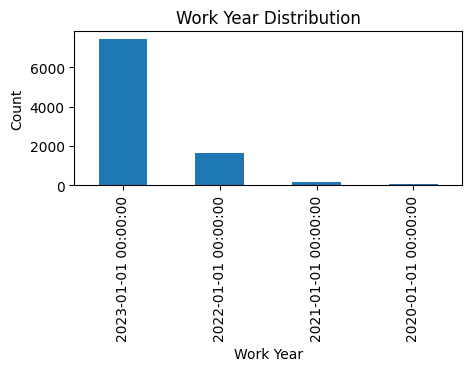

In [ ]:
# work_year bar chart, that shows us most of the records are coming from 2023.
plt.figure(figsize=(5, 2))
year_counts = data['work_year'].value_counts()
year_counts.plot(kind='bar', title='Work Year Distribution')
plt.xlabel('Work Year')
plt.ylabel('Count')
plt.show()

In [ ]:
data['job_title'].unique() # unique job titles in job_title column

array(['Data DevOps Engineer', 'Data Architect', 'Data Scientist',
       'Machine Learning Researcher', 'Data Engineer',
       'Machine Learning Engineer', 'Data Analyst', 'Analytics Engineer',
       'Applied Scientist', 'BI Developer',
       'Business Intelligence Engineer', 'Research Scientist',
       'Research Analyst', 'Research Engineer', 'Data Science Engineer',
       'Data Quality Analyst', 'Data Product Manager',
       'Machine Learning Scientist', 'AI Engineer', 'MLOps Engineer',
       'Deep Learning Engineer', 'Data Modeler', 'Data Product Owner',
       'Data Science Consultant', 'Business Intelligence Analyst',
       'AI Developer', 'Data Manager', 'ML Engineer',
       'Data Science Director', 'Head of Data', 'BI Analyst',
       'Data Management Analyst', 'Machine Learning Modeler',
       'Data Specialist', 'BI Data Analyst', 'Data Integration Engineer',
       'Business Intelligence Manager', 'Data Integration Specialist',
       'Data Science Practitioner', 'B

In [ ]:
# Here I count how many times a single job_title appears in the column.
unique_job_titles = data['job_title'].unique()
job_title_counts = data['job_title'].value_counts()

print("\nJob Title Counts:\n", job_title_counts)


Job Title Counts:
 Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
                                  ... 
Consultant Data Engineer             1
Sales Data Analyst                   1
Managing Director Data Science       1
AWS Data Architect                   1
Deep Learning Researcher             1
Name: job_title, Length: 125, dtype: int64


In [ ]:
# and how many are unique
data['job_title'].nunique() # 125 in total unique job titles
print('Total number of unique job titles:', data['job_title'].nunique())

Total number of unique job titles: 125


In [ ]:
# Theese are most frequent job titles in the dataset.
job_title_most_frequent = job_title_counts.head(15)
job_title_most_frequent

Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
Research Scientist                 269
Analytics Engineer                 256
Data Architect                     213
Business Intelligence Engineer     144
Research Engineer                  144
Data Manager                       132
ML Engineer                        106
Data Science Manager                88
Machine Learning Scientist          76
Business Intelligence Analyst       54
Name: job_title, dtype: int64

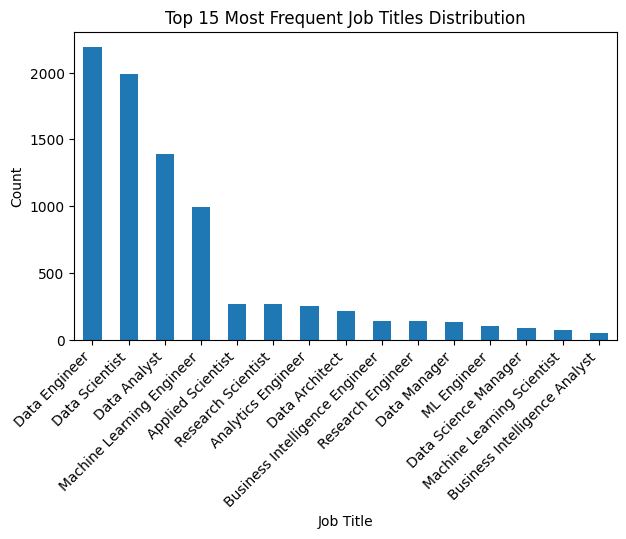

In [ ]:
# Top 15 Most Frequent Job Titles Distribution
plt.figure(figsize=(7, 4))
job_title_most_frequent.plot(kind='bar', title='Top 15 Most Frequent Job Titles Distribution')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()

In [ ]:
# unique values of job category column.
data['job_category'].unique()

array(['Data Engineering', 'Data Architecture and Modeling',
       'Data Science and Research', 'Machine Learning and AI',
       'Data Analysis', 'Leadership and Management',
       'BI and Visualization', 'Data Quality and Operations',
       'Data Management and Strategy', 'Cloud and Database'], dtype=object)

In [ ]:
# How many unique values in job_category are there?
data['job_category'].nunique()
print('Total number of unique job categories:', data['job_category'].nunique() )

Total number of unique job categories: 10


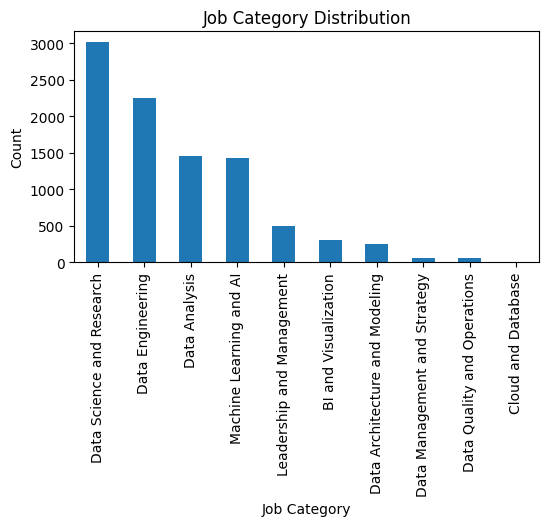

In [ ]:
# job category distribution, we can see that the most common job categories are: Data Science and Research, Data Engineering, Data Analysis, Machine Learning and AI, Leadership and Management
plt.figure(figsize=(6, 3))
job_category_counts = data['job_category'].value_counts()
job_category_counts.plot(kind='bar', title='Job Category Distribution')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# unique salary currencies
data['salary_currency'].unique()

array(['EUR', 'USD', 'GBP', 'CAD', 'AUD', 'PLN', 'BRL', 'TRY', 'CHF',
       'SGD', 'DKK'], dtype=object)

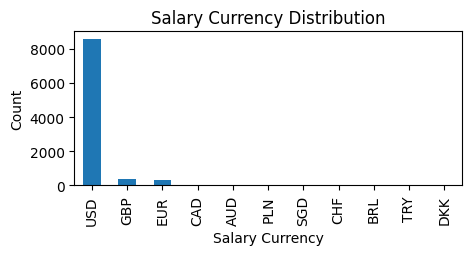

In [ ]:
# salary currency distribution --> most common currency is USD;
plt.figure(figsize=(5, 2))
salary_currency_counts = data['salary_currency'].value_counts()
salary_currency_counts.plot(kind='bar', title='Salary Currency Distribution')
plt.xlabel('Salary Currency')
plt.ylabel('Count')
plt.show()

In [ ]:
# unique employee residence values in the dataset;
data['employee_residence'].unique()

array(['Germany', 'United States', 'United Kingdom', 'Canada', 'Spain',
       'Ireland', 'South Africa', 'Poland', 'France', 'Czech Republic',
       'Netherlands', 'Pakistan', 'Ukraine', 'Lithuania', 'Portugal',
       'Australia', 'Uganda', 'Colombia', 'Italy', 'Slovenia', 'Romania',
       'Greece', 'India', 'Latvia', 'Mauritius', 'Armenia', 'Croatia',
       'Thailand', 'South Korea', 'Estonia', 'Turkey', 'Philippines',
       'Brazil', 'Qatar', 'Russia', 'Kenya', 'Tunisia', 'Ghana',
       'Belgium', 'Switzerland', 'Andorra', 'Ecuador', 'Peru', 'Mexico',
       'Moldova', 'Nigeria', 'Saudi Arabia', 'Argentina', 'Egypt',
       'Uzbekistan', 'Georgia', 'Central African Republic', 'Finland',
       'Austria', 'Singapore', 'Sweden', 'Kuwait', 'Cyprus',
       'Bosnia and Herzegovina', 'Iran', 'American Samoa', 'China',
       'Costa Rica', 'Chile', 'Puerto Rico', 'Denmark', 'Bolivia',
       'Dominican Republic', 'Indonesia', 'United Arab Emirates',
       'Malaysia', 'Japan', 'Hond

In [ ]:
# how many unique employee residence value are there?
data['employee_residence'].nunique()
print('Total number of unique employee residence:', data['employee_residence'].nunique())

Total number of unique employee residence: 83


In [ ]:
# count for every unique value how many times appear in the dataset;
unique_employee_residence = data['employee_residence'].unique()
employee_residence_counts = data['employee_residence'].value_counts()

print("\nJob Title Counts:\n", employee_residence_counts )


Job Title Counts:
 United States     8086
United Kingdom     442
Canada             224
Spain              117
Germany             66
                  ... 
Andorra              1
Qatar                1
Mauritius            1
Uganda               1
Malta                1
Name: employee_residence, Length: 83, dtype: int64


In [ ]:
# most common employee residence --> top 20
employee_residence_counts.head(20)

United States     8086
United Kingdom     442
Canada             224
Spain              117
Germany             66
France              54
Portugal            26
Netherlands         21
Australia           21
Italy               20
Brazil              19
Greece              16
Colombia            16
India               14
Nigeria             11
Poland              11
Estonia              9
Argentina            9
Mexico               9
Ireland              8
Name: employee_residence, dtype: int64

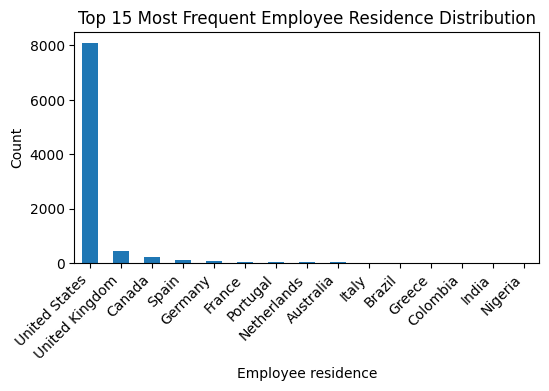

In [ ]:
# here the same info on the chart: United States, United Kingdom, Canada, Spain, Germany..
plt.figure(figsize=(6, 3))
employee_residence_counts.head(15).plot(kind='bar', title='Top 15 Most Frequent Employee Residence Distribution')
plt.xlabel('Employee residence')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()

In [ ]:
# unique experience level values;
data['experience_level'].unique()

array(['Mid-level', 'Senior', 'Executive', 'Entry-level'], dtype=object)

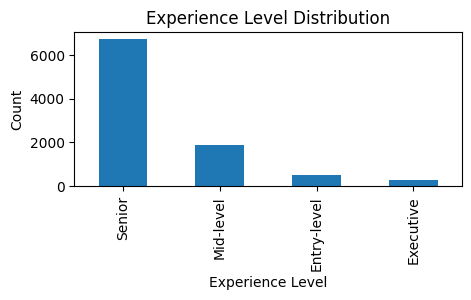

In [ ]:
# experience level distribution --> most common senior position
plt.figure(figsize=(5, 2))
experience_level_counts = data['experience_level'].value_counts()
experience_level_counts.plot(kind='bar', title='Experience Level Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

In [ ]:
# unique employment type values;
data['employment_type'].unique()

array(['Full-time', 'Part-time', 'Contract', 'Freelance'], dtype=object)

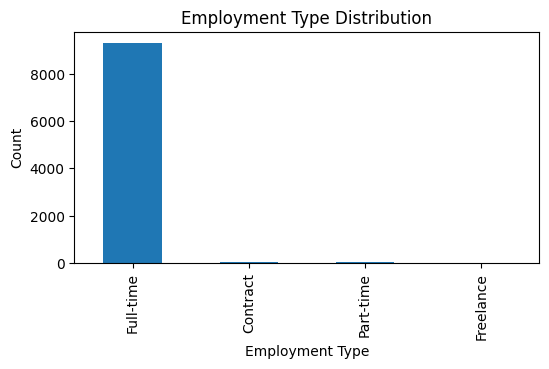

In [ ]:
# employment_type distribution --> most common type is full time;
plt.figure(figsize=(6, 3))
employment_type_counts = data['employment_type'].value_counts()
employment_type_counts.plot(kind='bar', title='Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# work setting unique values in the dataset;
data['work_setting'].unique()

array(['Hybrid', 'In-person', 'Remote'], dtype=object)

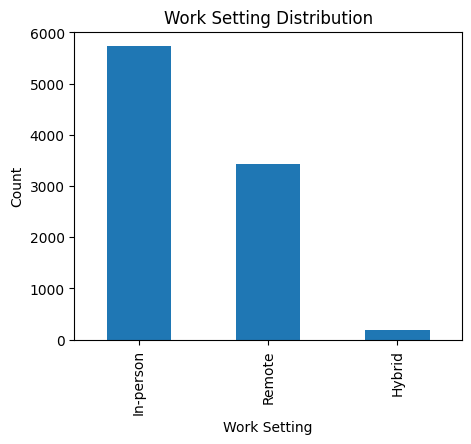

In [ ]:
# work setting distribution --> most common 'in-person';
plt.figure(figsize=(5, 4))
work_setting_counts = data['work_setting'].value_counts()
work_setting_counts.plot(kind='bar', title='Work Setting Distribution')
plt.xlabel('Work Setting')
plt.ylabel('Count')
plt.show()

In [ ]:
# unique company location values in the dataset;
data['company_location'].unique()

array(['Germany', 'United States', 'United Kingdom', 'Canada', 'Spain',
       'Ireland', 'South Africa', 'Poland', 'France', 'Netherlands',
       'Luxembourg', 'Lithuania', 'Portugal', 'Gibraltar', 'Australia',
       'Colombia', 'Ukraine', 'Slovenia', 'Romania', 'Greece', 'India',
       'Latvia', 'Mauritius', 'Russia', 'Italy', 'South Korea', 'Estonia',
       'Czech Republic', 'Brazil', 'Qatar', 'Kenya', 'Denmark', 'Ghana',
       'Sweden', 'Turkey', 'Switzerland', 'Andorra', 'Ecuador', 'Mexico',
       'Israel', 'Nigeria', 'Saudi Arabia', 'Argentina', 'Japan',
       'Central African Republic', 'Finland', 'Singapore', 'Croatia',
       'Armenia', 'Bosnia and Herzegovina', 'Pakistan', 'Iran', 'Bahamas',
       'Austria', 'Puerto Rico', 'American Samoa', 'Thailand',
       'Philippines', 'Belgium', 'Egypt', 'Indonesia',
       'United Arab Emirates', 'Malaysia', 'Honduras', 'Algeria', 'Iraq',
       'China', 'New Zealand', 'Moldova', 'Malta'], dtype=object)

In [ ]:
# Total number of unique company locations is 70;
data['company_location'].nunique()
print('Number of total unique company locations:', data['company_location'].nunique() )

Number of total unique company locations: 70


In [ ]:
company_location_value_counts = data['company_location'].value_counts()

In [ ]:
# Most common company locations --> United States, United Kingdom, Canada, Spain, Germany ...;
company_location_value_counts.head(20)

United States     8132
United Kingdom     449
Canada             226
Spain              113
Germany             72
France              50
Australia           24
Portugal            24
Netherlands         21
Brazil              17
Colombia            16
Greece              14
Italy               13
Mexico              10
Poland              10
Estonia             10
Nigeria              8
Ireland              8
India                7
Russia               7
Name: company_location, dtype: int64

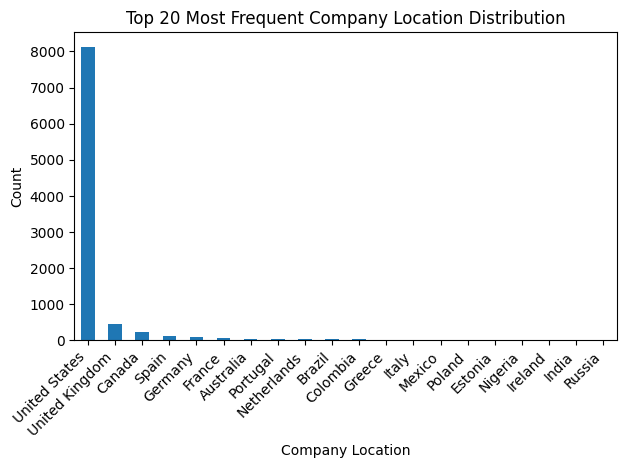

In [ ]:
# same info on the chart;
plt.figure(figsize=(7, 4))
company_location_value_counts.head(20).plot(kind='bar', title='Top 20 Most Frequent Company Location Distribution')
plt.xlabel('Company Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()

In [ ]:
data['company_size'].unique()

array(['L', 'M', 'S'], dtype=object)

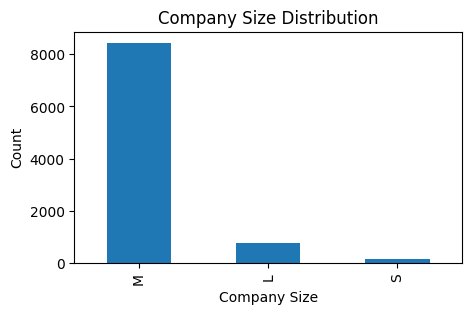

In [ ]:
# company size distribution --> most common are companies with middle size;
plt.figure(figsize=(5, 3))
company_size_counts = data['company_size'].value_counts()
company_size_counts.plot(kind='bar', title='Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()

Bivariate analysis involves exploring relationships between pairs of variables to uncover patterns, trends, and associations within a dataset. In the context of the provided data, which includes various measures related to job roles and salaries, let's delve into bivariate analyses for different aspects. Each analysis is accompanied by potential charts or visualizations that can be used to illustrate the findings:

- frequency of records for each year;
- average salary for each year;
- 10 most frequent job titles;
- top job titles by average salary;
- job titles with lowest average salary;
- salary by job category;
- salary based on employee residence;
- salary based on company location;
- salary based on experience level;

In [ ]:
# Filter data for the years 2020, 2021, 2022, and 2023
filtered_data = data[data['work_year'].dt.year.isin([2020, 2021, 2022, 2023])]

# Get the frequency of each year
year_frequency = filtered_data['work_year'].dt.year.value_counts().sort_index().reset_index()
year_frequency.columns = ['Work Year', 'Frequency']

# Convert 'Work Year' to integers
year_frequency['Work Year'] = year_frequency['Work Year'].astype(int)
year_frequency

,Work Year,Frequency
0,2020,71
1,2021,197
2,2022,1634
3,2023,7453


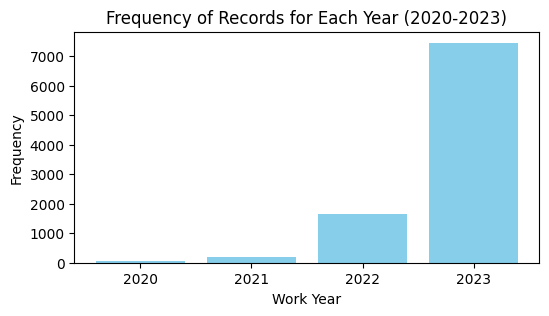

In [ ]:
# If 'work_year' is not in datetime format, convert it using pd.to_datetime
data['work_year'] = pd.to_datetime(data['work_year'], format='%Y')

# Filter data for the years 2020, 2021, 2022, and 2023
filtered_data = data[data['work_year'].dt.year.isin([2020, 2021, 2022, 2023])]

# Get the frequency of each year
year_frequency = filtered_data['work_year'].dt.year.value_counts().sort_index().reset_index()
year_frequency.columns = ['Work Year', 'Frequency']

# Convert 'Work Year' to strings to ensure discrete categories
year_frequency['Work Year'] = year_frequency['Work Year'].astype(str)

# Create a bar plot using matplotlib
plt.figure(figsize=(6, 3))
plt.bar(year_frequency['Work Year'], year_frequency['Frequency'], color='skyblue')
plt.title('Frequency of Records for Each Year (2020-2023)')
plt.xlabel('Work Year')
plt.ylabel('Frequency')
plt.show()


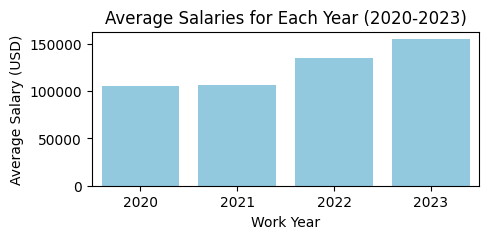

In [ ]:
# Filter data for the years 2020, 2021, 2022, and 2023
filtered_data = data[data['work_year'].dt.year.isin([2020, 2021, 2022, 2023])]

# Calculate average salary for each year
average_salaries = filtered_data.groupby(filtered_data['work_year'].dt.year)['salary_in_usd'].mean().reset_index()
average_salaries.columns = ['Work Year', 'Average Salary']

# Convert 'Work Year' to integers
average_salaries['Work Year'] = average_salaries['Work Year'].astype(int)

# Create a bar plot using seaborn
plt.figure(figsize=(5, 2))
sns.barplot(x='Work Year', y='Average Salary', data=average_salaries, color='skyblue')
plt.title('Average Salaries for Each Year (2020-2023)')
plt.xlabel('Work Year')
plt.ylabel('Average Salary (USD)')
plt.show()

In [ ]:
average_salaries

,Work Year,Average Salary
0,2020,105878.859155
1,2021,106483.644670
2,2022,135467.501836
3,2023,155132.591708


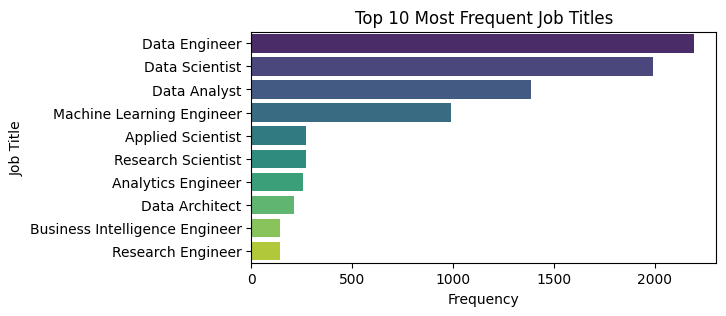

In [ ]:
# Get the frequency of job titles
job_title_frequency = data['job_title'].value_counts().reset_index()
job_title_frequency.columns = ['Job Title', 'Frequency']

# Create a bar plot using seaborn
plt.figure(figsize=(6, 3))
sns.barplot(x='Frequency', y='Job Title', data=job_title_frequency.head(10), palette='viridis')
plt.title('Top 10 Most Frequent Job Titles')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.show()

In [ ]:
job_title_frequency.head(20)

,Job Title,Frequency
0,Data Engineer,2195
1,Data Scientist,1989
2,Data Analyst,1388
3,Machine Learning Engineer,991
4,Applied Scientist,272
5,Research Scientist,269
6,Analytics Engineer,256
7,Data Architect,213
8,Business Intelligence Engineer,144
9,Research Engineer,144


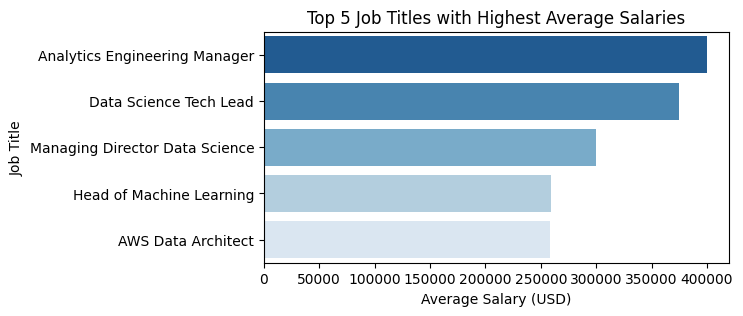

In [ ]:
# Calculate average salary for each job title
average_salary_by_job = data.groupby('job_title')['salary_in_usd'].mean().reset_index()
average_salary_by_job = average_salary_by_job.sort_values(by='salary_in_usd', ascending=False)

# Select the top and bottom 5 job titles by average salary
top_5_job_titles_high_salary = average_salary_by_job.head(5)
bottom_5_job_titles_low_salary = average_salary_by_job.tail(5)

# Create a bar plot for the top job titles with highest average salaries
plt.figure(figsize=(6, 3))
sns.barplot(x='salary_in_usd', y='job_title', data=top_5_job_titles_high_salary, palette='Blues_r')
plt.title('Top 5 Job Titles with Highest Average Salaries')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.show()

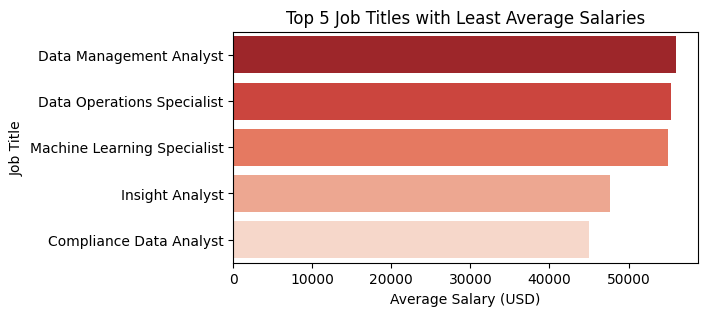

In [ ]:
# Create a bar plot for the bottom job titles with least average salaries
plt.figure(figsize=(6, 3))
sns.barplot(x='salary_in_usd', y='job_title', data=bottom_5_job_titles_low_salary, palette='Reds_r')
plt.title('Top 5 Job Titles with Least Average Salaries')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.show()

In [ ]:
# Display the DataFrames
print("Top 5 Job Titles with Highest Average Salaries:")
top_5_job_titles_high_salary

Top 5 Job Titles with Highest Average Salaries:


,job_title,salary_in_usd
8,Analytics Engineering Manager,399880.0
68,Data Science Tech Lead,375000.0
107,Managing Director Data Science,300000.0
87,Head of Machine Learning,259000.0
6,AWS Data Architect,258000.0


In [ ]:
print("\nTop 5 Job Titles with Least Average Salaries:")
bottom_5_job_titles_low_salary


Top 5 Job Titles with Least Average Salaries:


,job_title,salary_in_usd
49,Data Management Analyst,56000.000
57,Data Operations Specialist,55355.000
105,Machine Learning Specialist,55000.000
88,Insight Analyst,47673.875
31,Compliance Data Analyst,45000.000


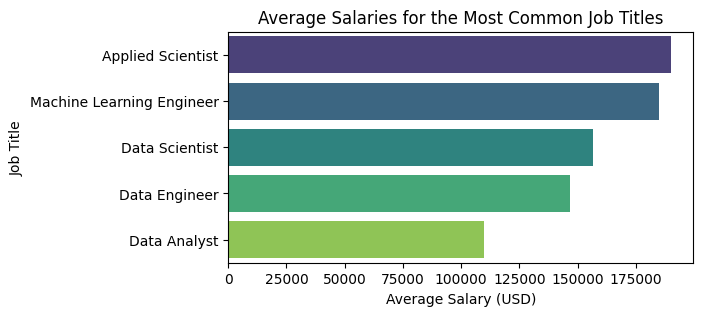

In [ ]:
# Get the frequency of job titles
job_title_frequency = data['job_title'].value_counts().reset_index()
job_title_frequency.columns = ['Job Title', 'Frequency']

# Select the top 5 most common job titles
top_5_job_titles = job_title_frequency.head(5)

# Merge with the original data to get salary information
merged_data = pd.merge(data, top_5_job_titles, left_on='job_title', right_on='Job Title', how='inner')

# Calculate average salary for each of the top 5 job titles
average_salary_by_job = merged_data.groupby('job_title')['salary_in_usd'].mean().reset_index()
average_salary_by_job = average_salary_by_job.sort_values(by='salary_in_usd', ascending=False)

# Create a bar plot for average salaries of the most common job titles
plt.figure(figsize=(6, 3))
sns.barplot(x='salary_in_usd', y='job_title', data=average_salary_by_job, palette='viridis')
plt.title('Average Salaries for the Most Common Job Titles')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.show()

In [ ]:
average_salary_df = pd.DataFrame({
    'Job Title': average_salary_by_job['job_title'],
    'Average Salary (USD)': average_salary_by_job['salary_in_usd']
})

# Display the DataFrame
average_salary_df

,Job Title,Average Salary (USD)
0,Applied Scientist,190171.606618
4,Machine Learning Engineer,184785.883956
3,Data Scientist,156681.015083
2,Data Engineer,146620.095216
1,Data Analyst,109911.472622


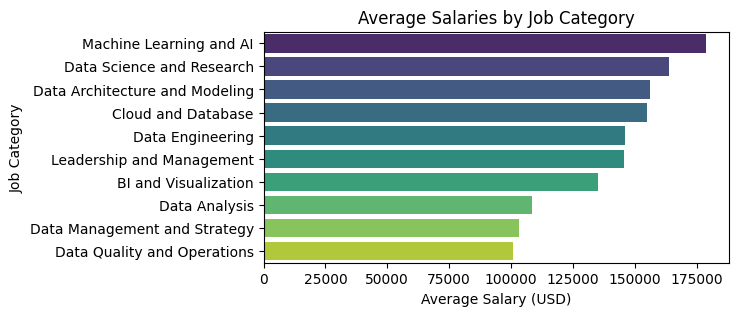

In [ ]:
# Calculate average salary for each job category
average_salary_by_category = data.groupby('job_category')['salary_in_usd'].mean().reset_index()
average_salary_by_category = average_salary_by_category.sort_values(by='salary_in_usd', ascending=False)

# Create a bar plot for average salaries by job category
plt.figure(figsize=(6, 3))
sns.barplot(x='salary_in_usd', y='job_category', data=average_salary_by_category, palette='viridis')
plt.title('Average Salaries by Job Category')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Category')
plt.show()

In [ ]:
average_salary_by_category

,job_category,salary_in_usd
9,Machine Learning and AI,178925.847339
7,Data Science and Research,163758.575979
3,Data Architecture and Modeling,156002.359073
1,Cloud and Database,155000.000000
4,Data Engineering,146197.656195
8,Leadership and Management,145476.019881
0,BI and Visualization,135092.102236
2,Data Analysis,108505.721345
5,Data Management and Strategy,103139.934426
6,Data Quality and Operations,100879.472727


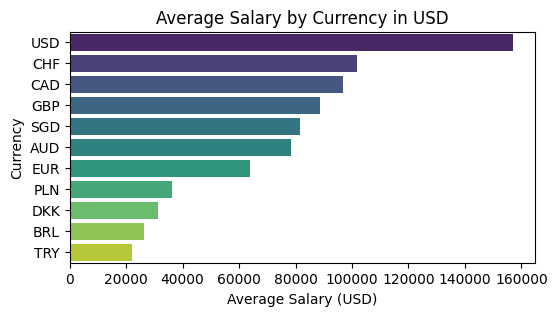

In [ ]:
# Calculate average salary for each currency
average_salary_by_currency = data.groupby('salary_currency')['salary_in_usd'].mean().reset_index()
average_salary_by_currency = average_salary_by_currency.sort_values(by='salary_in_usd', ascending=False)

# Create a bar plot for average salaries by currency
plt.figure(figsize=(6, 3))
sns.barplot(x='salary_in_usd', y='salary_currency', data=average_salary_by_currency, palette='viridis')
plt.title('Average Salary by Currency in USD')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Currency')
plt.show()

In [ ]:
average_salary_by_currency

,salary_currency,salary_in_usd
10,USD,156851.450821
3,CHF,101659.400000
2,CAD,96890.684211
6,GBP,88783.760807
8,SGD,81724.333333
0,AUD,78538.181818
5,EUR,63738.458824
7,PLN,36099.428571
4,DKK,31192.666667
1,BRL,26168.750000


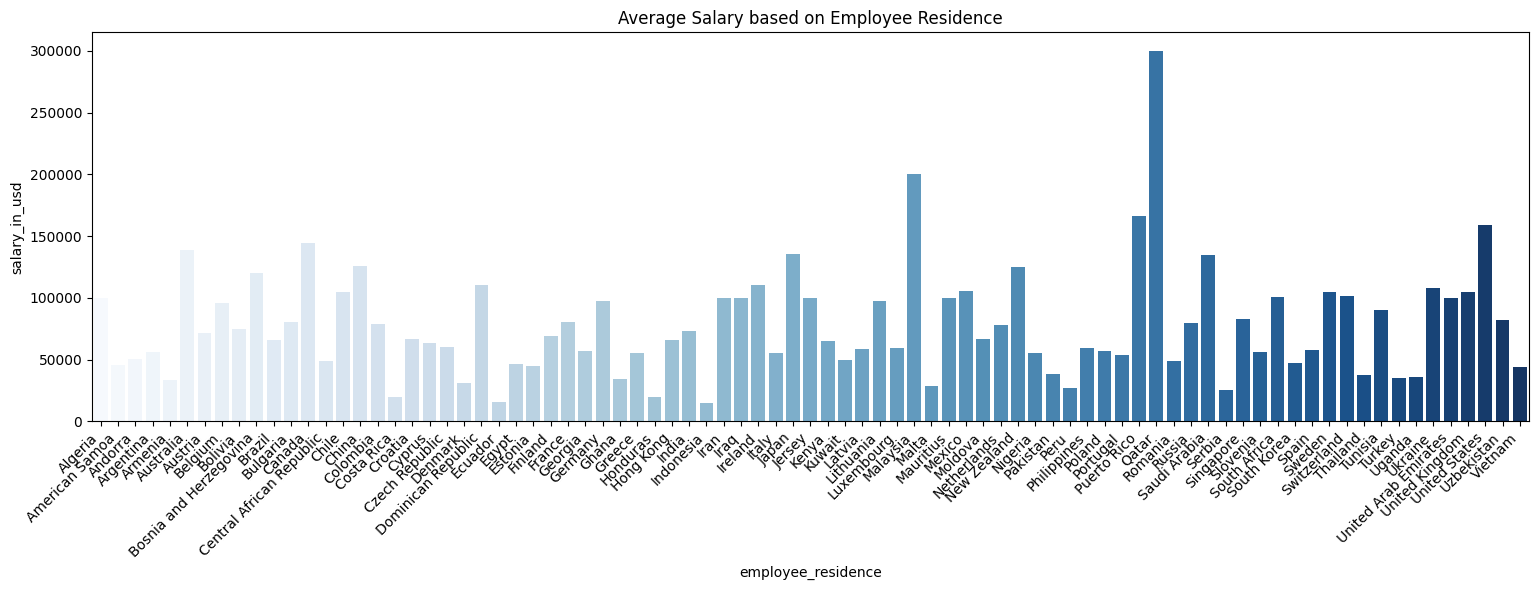

In [ ]:
# Average Salary based on Employee Residence
avg_salary_by_residence = data.groupby('employee_residence')['salary_in_usd'].mean().reset_index()

# Average Salary based on Company Location
avg_salary_by_location = data.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Create Plots
plt.figure(figsize=(30, 6))

# Plot 1: Average Salary based on Employee Residence
plt.subplot(1, 2, 1)
sns.barplot(x='employee_residence', y='salary_in_usd', data=avg_salary_by_residence, palette='Blues')
plt.title('Average Salary based on Employee Residence')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

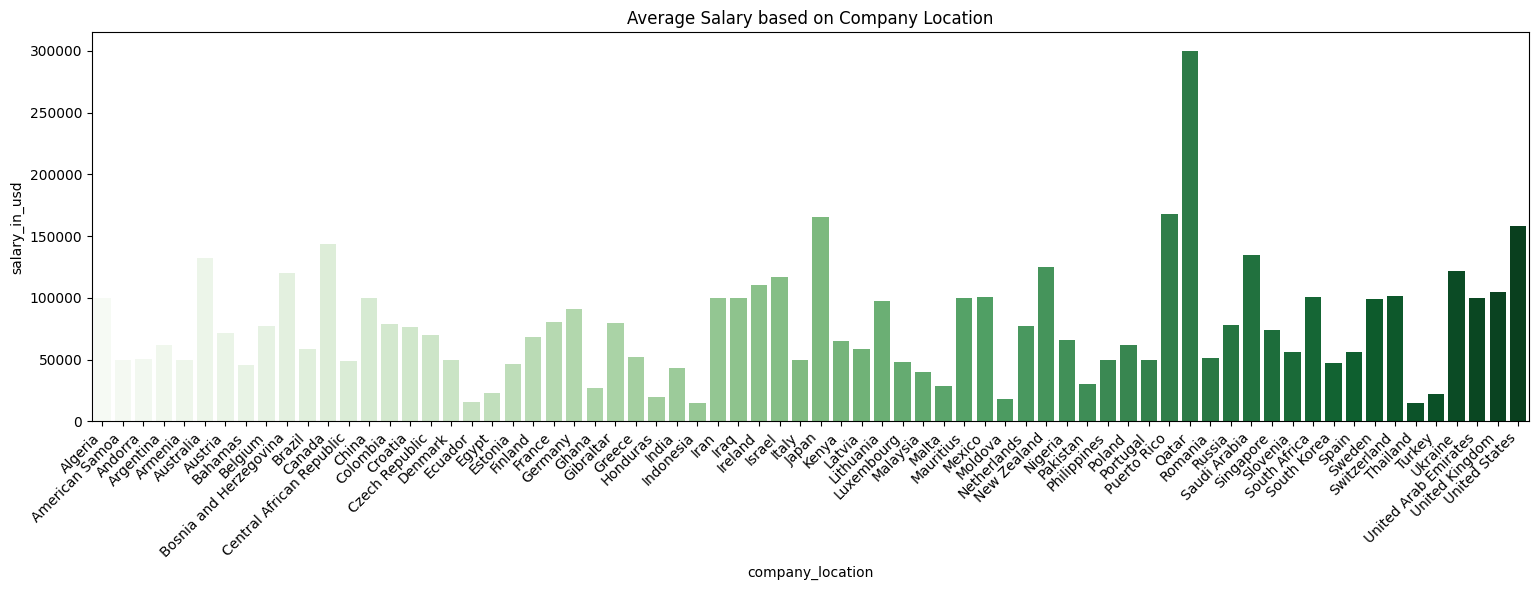

In [ ]:
# Plot 2: Average Salary based on Company Location
plt.figure(figsize=(30, 6))
plt.subplot(1, 2, 2)
sns.barplot(x='company_location', y='salary_in_usd', data=avg_salary_by_location, palette='Greens')
plt.title('Average Salary based on Company Location')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

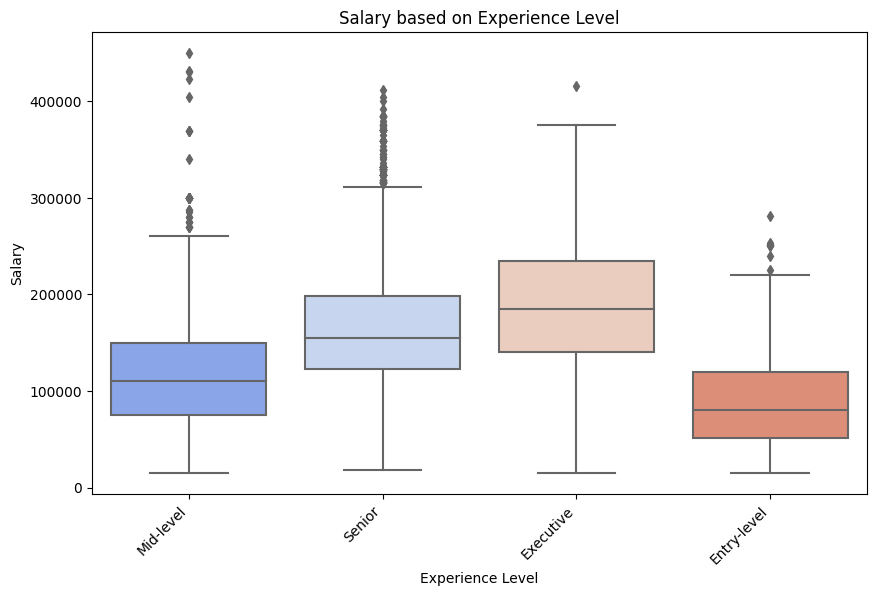

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data, palette='coolwarm')
plt.title('Salary based on Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

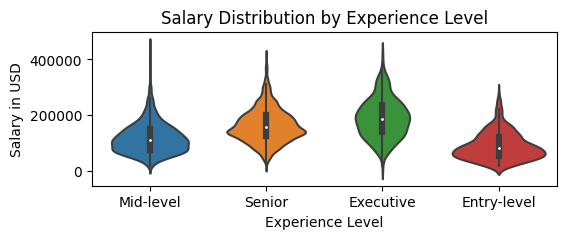

In [ ]:
# Assuming your DataFrame is named data
plt.figure(figsize=(6, 2))
sns.violinplot(x='experience_level', y='salary_in_usd', data=data)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

Multivariate analysis involves exploring relationships between three or more variables simultaneously. In the context of the provided data, which includes measures related to job roles, salaries, and employment details, here are the analyses along with potential charts or visualizations:

- Salary based on Employment Type and Work Setting;
- Salary based on Employment Type and Company Size;
- Average Salary Trends Over Years by category;
- Salary Fluctuations by Job Category and Work Year;
- Global Salary Comparison by Job Title;
- Relationship between Salary, Job Category, and Company Location;
- Average Salary in Each Category;
- correlation matrix with 'salary_in_usd', 'experience_level' and 'job_category';
- Map of the world with average salary info for every country;

<ipython-input-18-7a67a62eaa81>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



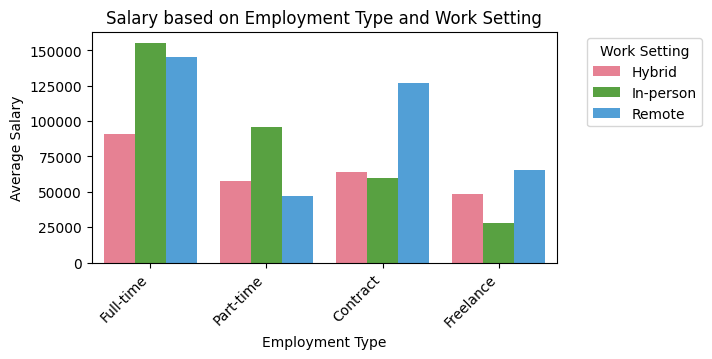

In [ ]:
# Create a bar plot for average salary based on employment type, work setting
plt.figure(figsize=(6, 3))
sns.barplot(x='employment_type', y='salary_in_usd', hue='work_setting', data=data, ci=None, palette='husl', estimator='mean')
plt.title('Salary based on Employment Type and Work Setting')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary')
plt.legend(title='Work Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-17-132b0c303443>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



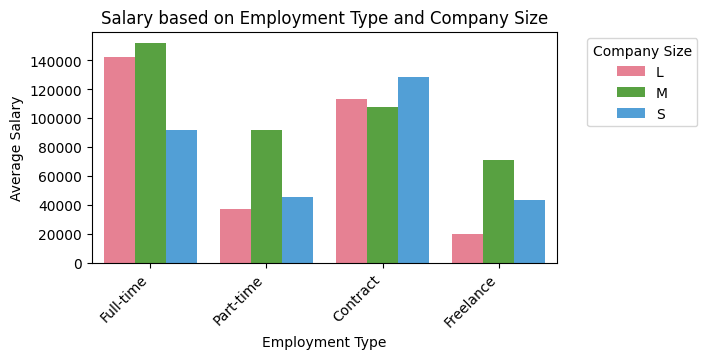

In [ ]:
# Create a bar plot for average salary based on employment type, company size
plt.figure(figsize=(6, 3))
sns.barplot(x='employment_type', y='salary_in_usd', hue='company_size', data=data, ci=None, palette='husl', estimator='mean')
plt.title('Salary based on Employment Type and Company Size')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary')
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-6-4111df425a5f>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

<ipython-input-6-4111df425a5f>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

<ipython-input-6-4111df425a5f>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

<ipython-input-6-4111df425a5f>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

<ipython-input-6-4111df425a5f>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

<ipython-input-6-4111df425a5f>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

<ipython-input-6-4111df425a5f>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

<ipython-input-6-4111df425a5f>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None

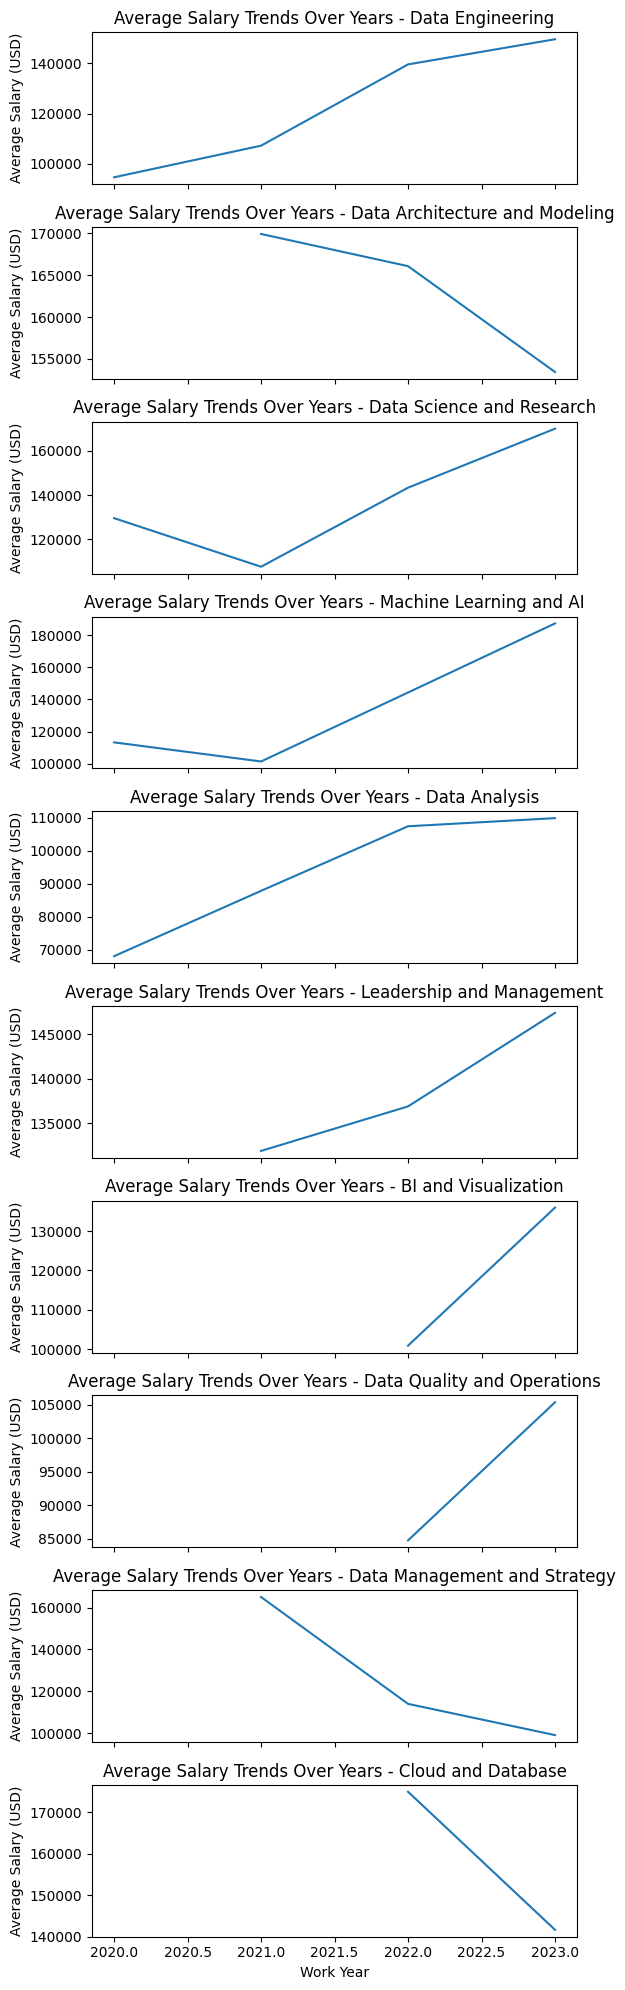

In [ ]:
# Assuming your DataFrame is named data
job_categories = data['job_category'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=len(job_categories), ncols=1, figsize=(6, 2 * len(job_categories)), sharex=True)

# Iterate through each job category
for i, category in enumerate(job_categories):
    ax = axes[i]
    category_data = data[data['job_category'] == category]
    sns.lineplot(x='work_year', y='salary_in_usd', data=category_data, ci=None, ax=ax)
    ax.set_title(f'Average Salary Trends Over Years - {category}')
    ax.set_xlabel('Work Year')
    ax.set_ylabel('Average Salary (USD)')

plt.tight_layout()
plt.show()


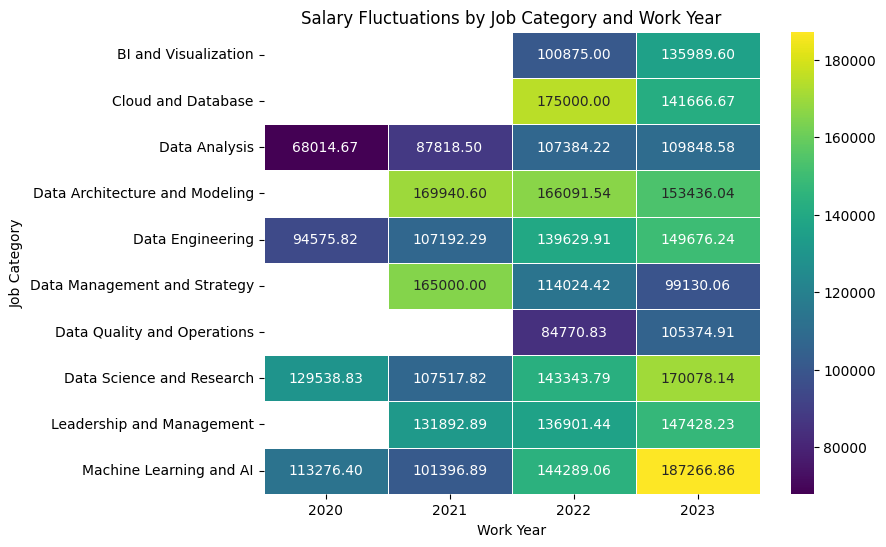

In [ ]:
# To analyze salary fluctuations by job category and work year, we can use a heatmap or a grouped bar chart;
plt.figure(figsize=(8, 6))
heatmap_data = data.pivot_table(index='job_category', columns='work_year', values='salary_in_usd', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Salary Fluctuations by Job Category and Work Year')
plt.xlabel('Work Year')
plt.ylabel('Job Category')
plt.show()

In [ ]:
# Machine Learning and AI and Data Science and Research as job categories are changing drastically over the years from 2020 to 2023, so we can see drastically colors changing,
# otherwise, Leadership and Management has similar color over the years and some of the job categories are decreasing in salary amount over the years;

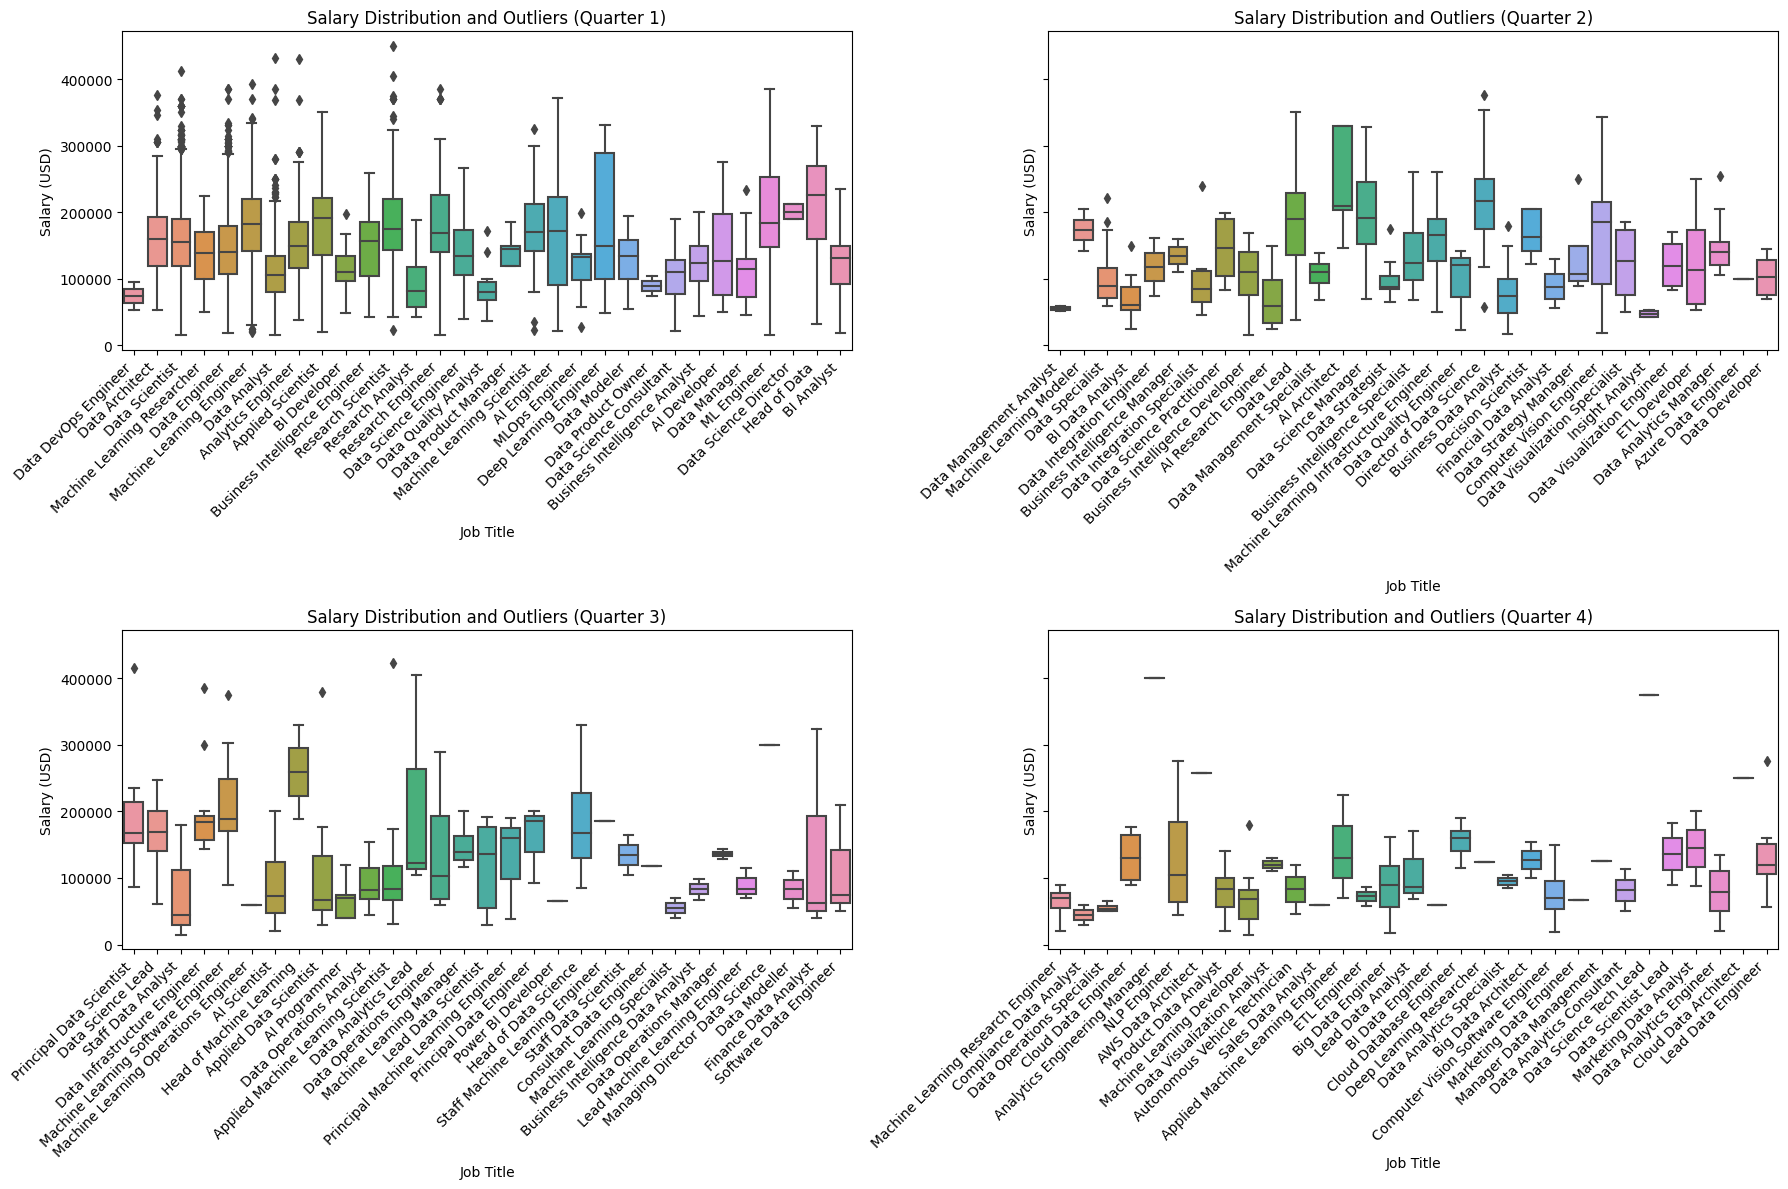

In [ ]:
# Assuming your DataFrame is named data
unique_job_titles = data['job_title'].unique()
num_titles = len(unique_job_titles)

# Divide the job titles into four quarters
quarters = [unique_job_titles[i:i+num_titles//4] for i in range(0, num_titles, num_titles//4)]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12), sharey=True)

for i in range(2):
    for j in range(2):
        current_titles = quarters[i*2 + j]
        current_data = data[data['job_title'].isin(current_titles)]
        sns.boxplot(x='job_title', y='salary_in_usd', data=current_data, ax=axes[i, j])
        axes[i, j].set_title(f'Salary Distribution and Outliers (Quarter {i*2 + j + 1})')
        axes[i, j].set_xlabel('Job Title')
        axes[i, j].set_ylabel('Salary (USD)')
        axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

# Scatter plot with hover information for global salary comparison
fig = px.scatter(data, x='employee_residence', y='salary_in_usd', color='job_title',
                 hover_data=['job_category', 'experience_level'], title='Global Salary Comparison by Job Title')
fig.update_layout(xaxis_title='Employee Residence', yaxis_title='Salary in USD')
fig.show()

In [ ]:
# Assuming your DataFrame is named data
# Assuming 'salary_in_usd', 'job_category', and 'company_location' columns exist in df

fig = px.scatter(data, x='company_location', y='salary_in_usd', color='job_category',
                 size='salary_in_usd', hover_data=['job_category'],
                 title='Relationship between Salary, Job Category, and Company Location',
                 size_max=20)

fig.update_layout(xaxis_title='Company Location', yaxis_title='Salary (USD)')

fig.show()

In [ ]:
country_coordinates = {
    'Germany': (51.1657, 10.4515),
    'United States': (37.0902, -95.7129),
    'United Kingdom': (55.3781, -3.4360),
    'Canada': (56.1304, -106.3468),
    'Spain': (40.4637, -3.7492),
    'Ireland': (53.4129, -8.2439),
    'South Africa': (-30.5595, 22.9375),
    'Poland': (51.9194, 19.1451),
    'France': (46.6031, 1.8883),
    'Czech Republic': (49.8175, 15.4730),
    'Netherlands': (52.3676, 4.9041),
    'Pakistan': (30.3753, 69.3451),
    'Ukraine': (48.3794, 31.1656),
    'Lithuania': (55.1694, 23.8813),
    'Portugal': (39.3999, -8.2245),
    'Australia': (-25.2744, 133.7751),
    'Uganda': (1.3733, 32.2903),
    'Colombia': (4.5709, -74.2973),
    'Italy': (41.8719, 12.5674),
    'Slovenia': (46.1512, 14.9955),
    'Romania': (45.9432, 24.9668),
    'Greece': (39.0742, 21.8243),
    'India': (20.5937, 78.9629),
    'Latvia': (56.8796, 24.6032),
    'Mauritius': (-20.348404, 57.552152),
    'Armenia': (40.0691, 45.0382),
    'Croatia': (45.1000, 15.2000),
    'Thailand': (15.8700, 100.9925),
    'South Korea': (35.9078, 127.7669),
    'Estonia': (58.5953, 25.0136),
    'Turkey': (38.9637, 35.2433),
    'Philippines': (12.8797, 121.7740),
    'Brazil': (-14.2350, -51.9253),
    'Qatar': (25.276987, 51.520008),
    'Russia': (61.5240, 105.3188),
    'Kenya': (-1.2921, 36.8219),
    'Tunisia': (33.8869, 9.5375),
    'Ghana': (7.2500, -2.5000),
    'Belgium': (50.8503, 4.3517),
    'Switzerland': (46.8182, 8.2275),
    'Andorra': (42.5462, 1.6016),
    'Ecuador': (-1.8312, -78.1834),
    'Peru': (-9.1900, -75.0152),
    'Mexico': (23.6345, -102.5528),
    'Moldova': (47.4116, 28.3699),
    'Nigeria': (9.0820, 8.6753),
    'Saudi Arabia': (23.8859, 45.0792),
    'Argentina': (-38.4161, -63.6167),
    'Egypt': (26.8206, 30.8025),
    'Uzbekistan': (41.3775, 64.5853),
    'Georgia': (42.3154, 43.3569),
    'Central African Republic': (6.6111, 20.9394),
    'Finland': (61.9241, 25.7482),
    'Austria': (47.5162, 14.5501),
    'Singapore': (1.3521, 103.8198),
    'Sweden': (60.1282, 18.6435),
    'Kuwait': (29.3759, 47.9774),
    'Cyprus': (35.1264, 33.4299),
    'Bosnia and Herzegovina': (43.9159, 17.6791),
    'Iran': (32.4279, 53.6880),
    'American Samoa': (-14.2700, -170.1322),
    'China': (35.8617, 104.1954),
    'Costa Rica': (9.7489, -83.7534),
    'Chile': (-35.6751, -71.5430),
    'Puerto Rico': (18.2208, -66.5901),
    'Denmark': (56.2639, 9.5018),
    'Bolivia': (-16.2902, -63.5887),
    'Dominican Republic': (18.7357, -70.1627),
    'Indonesia': (-0.7893, 113.9213),
    'United Arab Emirates': (23.4241, 53.8478),
    'Malaysia': (4.2105, 101.9758),
    'Japan': (36.2048, 138.2529),
    'Honduras': (15.199999, -86.2419),
    'Algeria': (28.0339, 1.6596),
    'Vietnam': (14.0583, 108.2772),
    'Iraq': (33.3152, 44.3661),
    'Bulgaria': (42.7339, 25.4858),
    'Jersey': (49.2144, -2.1312),
    'Serbia': (44.0165, 21.0059),
    'New Zealand': (-40.9006, 174.8860),
    'Hong Kong': (22.3964, 114.1095),
    'Luxembourg': (49.8153, 6.1296),
    'Malta': (35.9375, 14.3754)
}

In [ ]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Create a map centered around the world
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Create a MarkerCluster layer for better marker management
marker_cluster = MarkerCluster().add_to(world_map)

# Iterate over the rows of your DataFrame
for country, coordinates in country_coordinates.items():
    # Get salary information for the country
    salary_info = data[data['employee_residence'] == country]['salary_in_usd'].values

    # Calculate the average salary
    average_salary = round(salary_info.mean()) if len(salary_info) > 0 else None

    # Popup text
    popup_text = f"{country}: {average_salary}$ (Average)" if average_salary else f"{country}: No salary information available"

    # Add a marker for each country with salary information and a tooltip
    folium.Marker(
        location=coordinates,
        popup=popup_text,
        tooltip=f"{country}\nAvg Salary: {average_salary}$",  # Tooltip with average salary information
        icon=None,  # You can customize the marker icon if needed
    ).add_to(marker_cluster)

# Display the map in the notebook
display(world_map)

In [ ]:
import plotly.express as px

# Assuming your DataFrame is named data
# Assuming 'salary_in_usd', 'job_category', and 'job_title' columns exist in data

# Calculate average salary for each combination of 'job_category' and 'job_title'
avg_salary_data = data.groupby(['job_category', 'job_title'])['salary_in_usd'].mean().reset_index()

# Create the treemap using average salary
fig = px.treemap(avg_salary_data, path=['job_category', 'job_title'], values='salary_in_usd',
                 title='Average Salary in Each Category')
fig.show()

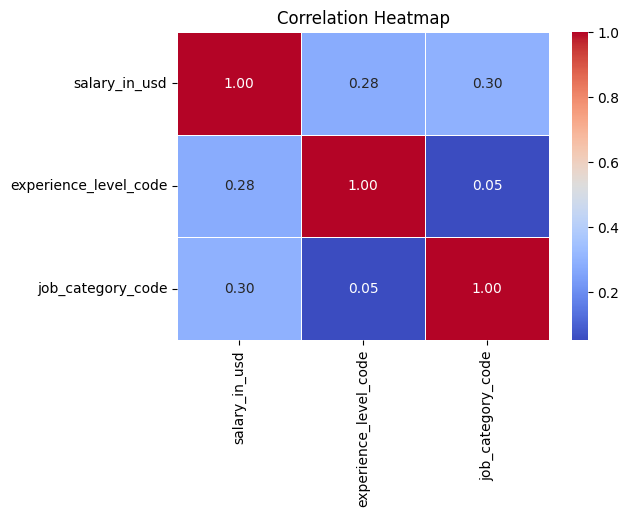

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Assuming 'salary_in_usd', 'experience_level', and 'job_category' columns exist in df

# Encode categorical variables as numerical values for correlation analysis
data['experience_level_code'] = data['experience_level'].astype('category').cat.codes
data['job_category_code'] = data['job_category'].astype('category').cat.codes

# Select relevant columns for correlation analysis
correlation_data = data[['salary_in_usd', 'experience_level_code', 'job_category_code']]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Conclusion and Recommendations

The analysis of average salary data ranging from 100,000 USD to 200,000 USD in 2023 reveals a robust job market with a competitive compensation landscape, primarily concentrated in high-demand roles. With a dataset spanning various job titles and categories, the industry showcases a diverse range of opportunities, emphasizing the significance of skills in data science, machine learning, and analytics.

Key Findings:

Job Titles and Categories:

A total of 9355 records were analyzed, showcasing diversity in job titles.
The top five job titles include Data Engineer, Data Scientist, Data Analyst, Machine Learning Engineer, and Applied Scientist.
Common job categories encompass Data Science and Research, Data Engineering, Data Analysis, and Machine Learning and AI.

Recommendations Based on Analysis:

Skill Enhancement: Continuous improvement in skills related to prevalent roles like Data Engineer and Data Scientist is essential.

Industry Focus: Consider industries such as technology, healthcare, or finance, aligning with growing job categories.

Networking: Connect with professionals across diverse roles to broaden career opportunities.

Continued Education: Invest in ongoing education and certifications to stay current in this dynamic job market.

Employee Data Analysis: Geographical Distribution, Work Settings, and Factors Influencing the Job Market

The analysis extends to geographical distribution, work settings, and other influential factors, offering additional insights into the diverse nature of the job market.

Key Insights:

Geographical Distribution:

The dataset spans 83 unique locations, with the United States, United Kingdom, and Canada as prominent hubs.
The global nature of the industry provides professionals with opportunities across diverse locations.
Experience Level, Employment Type, and Work Settings:

Senior-level experience is prevalent, emphasizing the industry's demand for expertise.

Full-time employment dominates, with a significant presence in remote and a little less hybrid work settings.

Recommendations:

Global Job Market Exploration: Explore opportunities beyond local borders for a wider range of career prospects.
Skill Highlighting for Senior Roles: Emphasize leadership capabilities for career advancement.

Flexible Work Approach: Align job preferences with in-person, remote, or hybrid work settings.

Company Culture Assessment: Assess company cultures to ensure long-term job satisfaction.

Trend Analysis: Average Salary Increase from 2020 to 2023.

The upward trend in average salary over the years signifies a positive trajectory for the data science and machine learning industry. Specific job titles and categories have seen significant increases, reflecting the industry's recognition of leadership, expertise, and specialized skills.

Recommendations:

Skill Development: Focus on skills relevant to common high-paying job titles for enhanced marketability.
Leadership Opportunities: Seek opportunities to showcase leadership skills, crucial for roles such as Analytics Engineering Manager or Head of Machine Learning.
Specialized Expertise: Consider specializing in areas like AWS Data Architecture for career advancement.

Industry Networking: Build a strong professional network to stay informed about trends and salary benchmarks.

Recommendations:

Executive-Level Career Development: Focus on leadership development for executive roles.
Industry-Specific Skill Development: Tailor skills to align with specific job categories trending in the region.
Consideration of Company Size: Explore opportunities in medium-sized companies, considering culture and growth prospects.
Global Market Awareness: Stay informed about global salary benchmarks for strategic career moves.


In Conclusion:
Professionals in the data science and machine learning industry are advised to continuously enhance their skills, align with industry trends, explore diverse job markets, and strategically plan their professional development for sustained success.
